In [76]:
# Importing necessary modules.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import itertools

import statsmodels.api as sm
%matplotlib inline

In [77]:
# Step 1: Data Preprocessing
import pandas as pd

# Load the Superstore sales dataset
dataset = pd.read_csv('Superstore.csv', encoding='Windows-1252')

In [78]:

dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [79]:
dataset.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

## Data Preprocessing

In [80]:
# Convert date column to datetime format
dataset['Order Date'] = pd.to_datetime(df['Order Date'])

In [81]:
print(dataset['Order Date'].min())
print(dataset['Order Date'].max())

2014-01-03 00:00:00
2017-12-30 00:00:00


In [82]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
        'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity',
        'Discount', 'Profit']
dataset.drop(cols, axis=1, inplace=True)

In [83]:
# furniture data
dataset.sort_values('Order Date')
dataset.isna().sum()

Order Date    0
Sales         0
dtype: int64

In [84]:
dataset = dataset.groupby('Order Date')['Sales'].sum().reset_index()

## Indexing time-series data 

In [85]:
dataset = dataset.set_index('Order Date')
dataset.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1237, freq=None)

In [86]:
# Averaging Daily Sales
y = dataset['Sales'].resample('MS').mean()

In [87]:
y['2017':]

Order Date
2017-01-01    1911.798870
2017-02-01    1015.056670
2017-03-01    2102.584029
2017-04-01    1352.649485
2017-05-01    1639.300378
2017-06-01    2037.758681
2017-07-01    1560.841931
2017-08-01    2337.810667
2017-09-01    3138.094714
2017-10-01    2777.747257
2017-11-01    3948.260833
2017-12-01    2890.666166
Freq: MS, Name: Sales, dtype: float64

## Sales data time-series visualization

<Axes: xlabel='Order Date'>

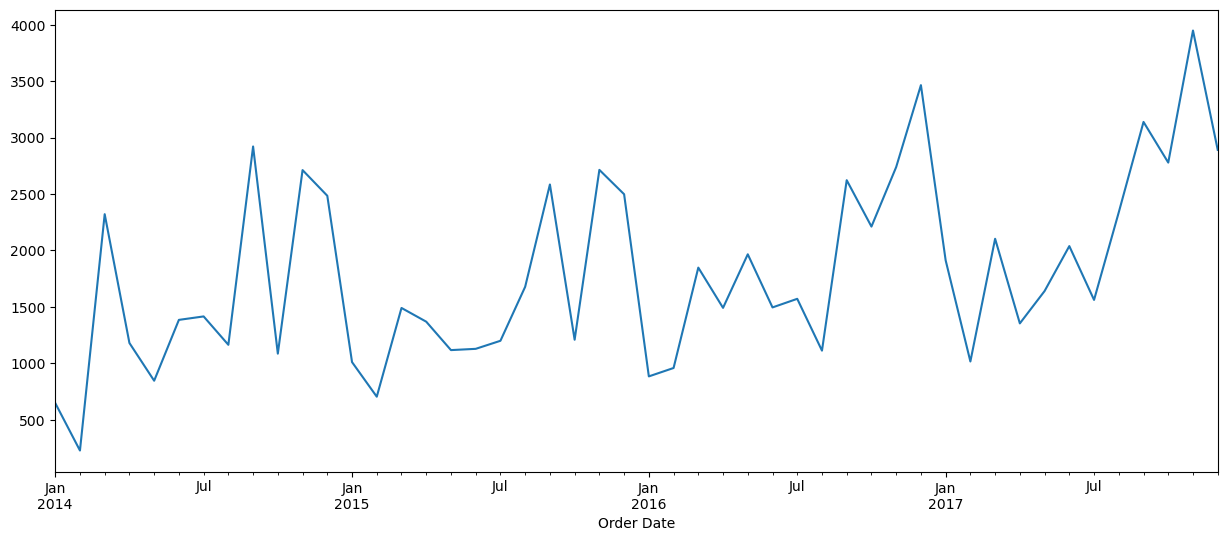

In [88]:
y.plot(figsize=(15, 6))

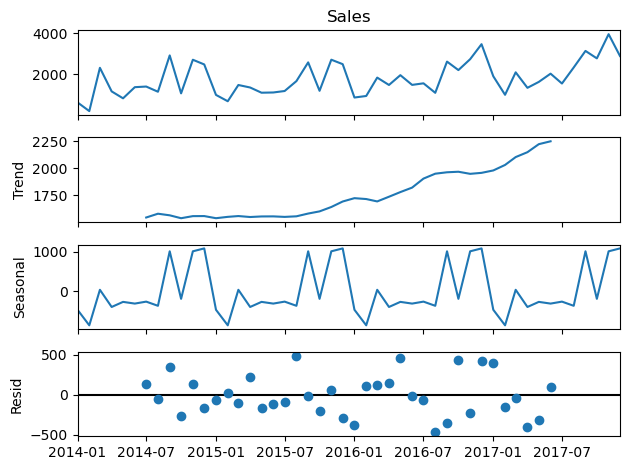

In [89]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()
plt.show()

The above plot shows that the sales is highly unstable with seasonality and trend easily observable.

## Time Series forecasting with ARIMA Model

ARIMA models are donated with the notation: ARIMA (p, d, q) where:
* p denotes seasonality
* d denotes trend
* q denotes noise in data

Configuring a SARIMA requires selecting hyperparameters for both the trend and seasonal components of the series.

Trend Components:
* p denotes Trend autoregression order
* d denotes Trend difference order
* q denotes Trend moving average order

Seasonality Components:
* p denotes Seasonal autoregressive order.
* d denotes Seasonal difference order.
* q denotes Seasonal moving average order.
* m denotes the number of time steps for a single seasonal period.

In [90]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Few parameter combinations are:')
print('{} x {}'.format(pdq[1], seasonal_pdq[1]))
print('{} x {}'.format(pdq[2], seasonal_pdq[2]))

Few parameter combinations are:
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)


Now that we've generated all possible parameters for our SARIMA model, we shall find out the best parameter to train the model on it finally.

SARIMA stands for **Seasonal AutoRegressive Integrated Moving Average** model which is an extension of ARIMA model used in modeling the seasonality component as well. So, we need not to make time-series stationary (non-seasonal) first before forecasting. 

In [91]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:849.2964734613763
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1590.1120869217718
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:542.5524077991603


C:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:364.82273932498606
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:556.4030539681389
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:536.1242565877371
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:379.31311116746053
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:365.93920356260446
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:800.9546615001078
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:2825.5314846901006
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:528.8097917495891


C:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:349.61477907428423
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:558.3100438885385
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:520.4226827071626
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:378.644398383292


C:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:350.7521824880163
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:761.9496656386242
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1651.0315016463314
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:545.4367571282644
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:349.88209640182
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:549.6307002149172


C:\anaconda\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\anaconda\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1558.701511357084
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:367.6372959140954
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:350.8549280755462
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:726.8822219811773


C:\anaconda\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:2584.075861983871
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:506.51020438908
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:325.30283752150615
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:539.5587096464591
ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:2584.438858064036
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:355.7631592753536


C:\anaconda\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:325.3887020412862
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:777.9055059640485


C:\anaconda\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1650.6973573525763
ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:543.6595443248249
ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:362.59038113868496
ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:548.4301230014481
ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:542.8009060964105
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:362.4033140616911
ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:364.38236025777155


C:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:745.0593148967013
ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:1138.5588766619749


C:\anaconda\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:529.4623072731885
ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:340.99592268066954
ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:536.579099582115
ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:521.7960925710529
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:357.3014613239102


C:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:342.29494868804284
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:753.5151712720058


C:\anaconda\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1658.5973604096791
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:535.7885418383611
ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:347.1683976484487
ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:528.5408441618672
ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1911.620030706658
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:347.54883822154034
ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:348.0708084368887


C:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:728.4101661769197
ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:2637.9045813972352


C:\anaconda\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:508.28545009326336
ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:327.3028151475046
ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:524.7930009179192


C:\anaconda\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1731.350403911407
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:343.1266572064245
ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:327.3743370558601


We got the lowest AIC value: 297.788 for ARIMA(1, 1, 1)x(0, 1, 1, 12). We shall use these best params in our model.

Here, the **Akaike information criterion (AIC)** is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

AIC estimates the relative amount of information lost by a given model: the less information a model loses (less AIC value), the higher the quality of that model.

In [92]:
# Training the ARIMA model.
model = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12), enforce_stationarity=False,
                                            enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

C:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0012      0.450     -0.003      0.998      -0.883       0.881
ma.L1         -0.8638      0.273     -3.167      0.002      -1.398      -0.329
ma.S.L12      -1.0439      5.477     -0.191      0.849     -11.778       9.690
sigma2      1.708e+05   9.82e+05      0.174      0.862   -1.75e+06     2.1e+06


## Validating the model forecasts

To validate the model results, we compare the actual sales with the predicted sales of the time series data starting
from 2017/01/01 till the end of the data.

            lower Sales  upper Sales
Order Date                          
2017-01-01   374.903073  2376.297152
2017-02-01   185.555797  2140.258203
2017-03-01  1346.232348  3282.184311
2017-04-01   830.867952  2757.280469
2017-05-01   717.234878  2636.965852
2017-06-01   739.887707  2654.836092
2017-07-01   849.838802  2761.325248
2017-08-01   772.714175  2681.674464
2017-09-01  2158.937216  4066.043378
2017-10-01  1074.682406  2980.421876
2017-11-01  2316.289172  4221.018891
2017-12-01  2474.729698  4377.844862


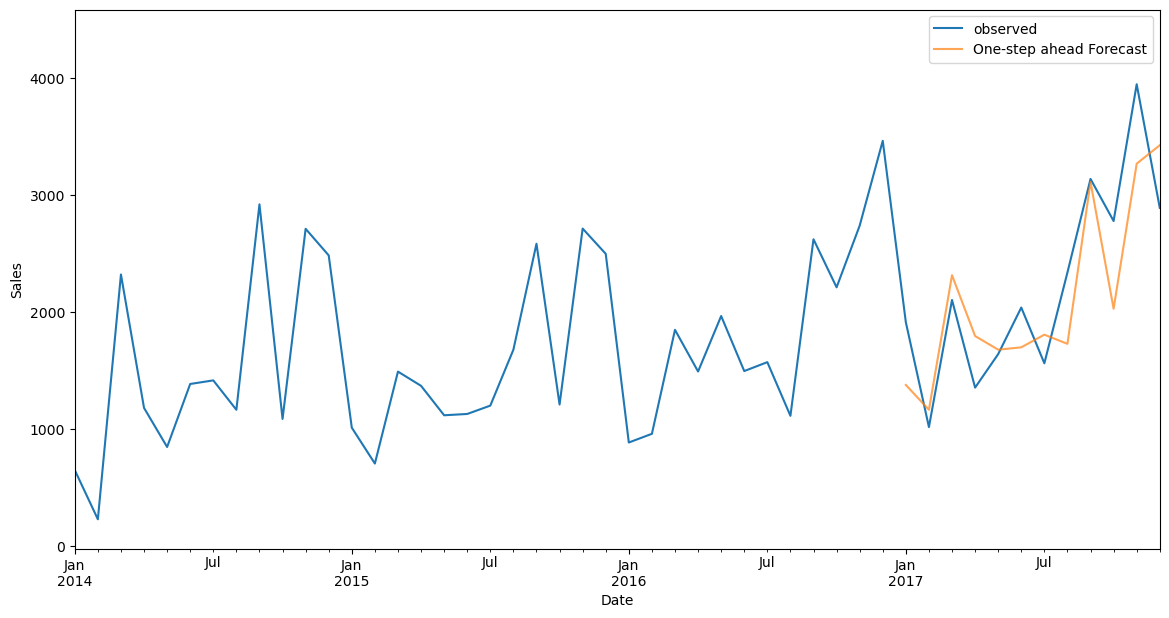

In [93]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci)
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

The above plot demonstrates that the predicted values alligns well with the true values capturing an upward seasonality. Now, we calculate the Mean Square Error of our predicted values wrt the orignal values.

In [94]:
y_predicted = pred.predicted_mean
y_true = y['2017-01-01':]
mse = ((y_predicted - y_true)**2).mean()
print('Mean Square Error is:', round(mse, 4))

Mean Square Error is: 200938.4988


In [95]:
print('Root Mean Square Error is:', np.sqrt(mse))

Root Mean Square Error is: 448.261641059135


## Future Forecasts

In [112]:
# Forecast future values using SARIMA model
forecast_steps = 100  # Number of forecasted steps (e.g., next 24 periods)
sarima_forecast = results.get_forecast(steps=forecast_steps)

# Get forecasted values and confidence intervals
forecast_values_sarima = sarima_forecast.predicted_mean
sarima_conf_int = sarima_forecast.conf_int()

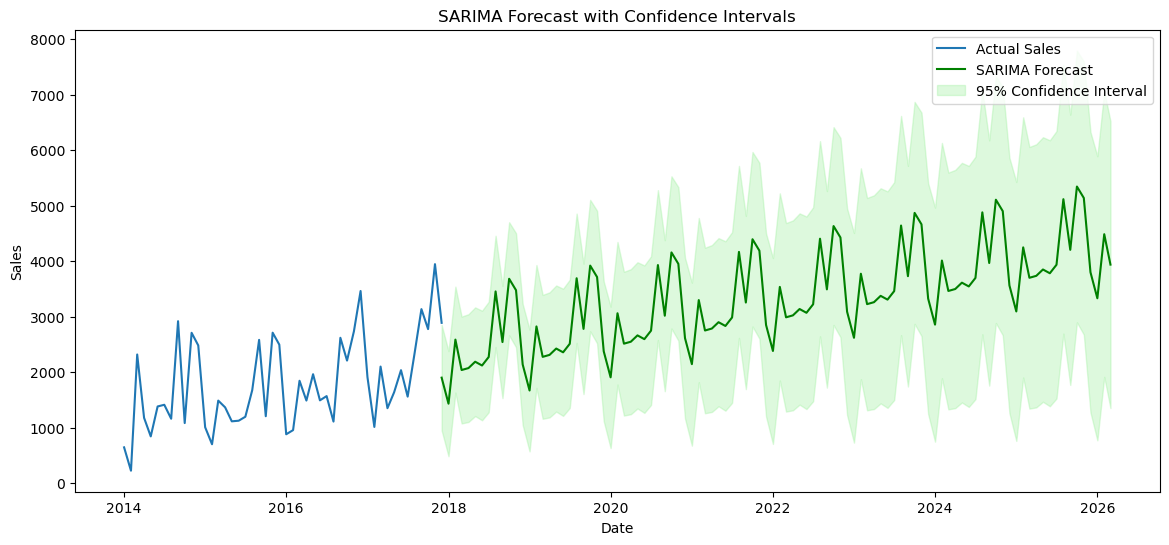

In [117]:
forecast_dates = pd.date_range(start=y.index[-1], periods=forecast_steps, freq='MS')

# Plot actual sales data
plt.figure(figsize=(14,6))
plt.plot(y.index, y, label='Actual Sales')

# Plot SARIMA forecast
plt.plot(forecast_dates, forecast_values_sarima, color='green', label='SARIMA Forecast')

# Plot confidence intervals
plt.fill_between(forecast_dates, sarima_conf_int.iloc[:, 0], sarima_conf_int.iloc[:, 1], color='lightgreen', alpha=0.3, label='95% Confidence Interval')

# Add labels and legend
plt.title('SARIMA Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# Show plot
plt.show()

Here, note that the confidence interval is increasing as we move further into the future. The model becomes less confident in predicting the values as we move ahead.